# Reddit TimeZone - quick lightgbm

In [21]:
%reload_ext autoreload
%autoreload 2

from DataCollection import DataCollection
from ML import ML
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline 

import numpy as np
import lightgbm as lgb


In [22]:
path = '/Users/rizki/Documents/Projects/withDeclan/reddit_DS/'
folder = 'savedat/'
dataset = 'ALL/'

In [24]:
def aggCities(path_to_files):
    allfiles = glob.glob(path_to_files+'/*.csv')
    #print(allfiles)

    df_list = []
    cols = []
    for i,file in enumerate(allfiles):
        if i==0:
            df_temp = pd.read_csv(file)
            col = df_temp.columns.values
        df = pd.read_csv(file,header=0)
        df_list.append(df)

    df_all = pd.DataFrame(columns=cols)
    df_all = pd.concat(df_list)

    cities = df_all['subreddit'].unique()
    long_str_cities = ''
    for c in cities: long_str_cities = '{}_{}'.format(long_str_cities,c)
    
    l = list(df_all.columns.values)
    bins = len([e for e in l if 'bin' in e])

    save_name = path+folder+dataset+'aggregate_{}bins{}.csv'.format(bins,long_str_cities)
    df_all.to_csv(save_name)    
    
    return df_all

df_all = aggCities(path+folder+dataset)
df_all.groupby('subreddit')['bin0'].count()

subreddit
brazil          98
chicago         98
denver          99
geneva          99
india           98
moscow          99
sanfrancisco    98
sydney          99
turkey          99
Name: bin0, dtype: int64

In [25]:
df_all.drop(columns='Unnamed: 0',inplace=True)

In [26]:
df_all.groupby('subreddit').sum()

,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,...,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23
subreddit,,,,,,,,,,,,,,,,,,,,,
brazil,3649.0,3574.0,3452.0,2902.0,2185.0,1548.0,1162.0,908.0,804.0,915.0,...,4348.0,4706.0,4960.0,5157.0,5310.0,5133.0,4751.0,3892.0,3644.0,3585.0
chicago,4140.0,4292.0,4596.0,4776.0,4157.0,3151.0,1681.0,921.0,597.0,348.0,...,4816.0,6170.0,7094.0,7211.0,7276.0,7419.0,7173.0,6928.0,5581.0,4588.0
denver,4291.0,4051.0,4116.0,4392.0,4035.0,3179.0,2220.0,1602.0,906.0,572.0,...,4346.0,6026.0,7038.0,7258.0,7356.0,7354.0,7032.0,6611.0,5986.0,5044.0
geneva,660.0,386.0,333.0,258.0,222.0,372.0,774.0,1134.0,1283.0,1377.0,...,1790.0,1771.0,1724.0,1564.0,1451.0,1496.0,1543.0,1595.0,1271.0,897.0
india,1237.0,1304.0,1967.0,2746.0,3638.0,4561.0,5405.0,5042.0,5018.0,4976.0,...,5402.0,5304.0,6191.0,6380.0,6703.0,5463.0,3083.0,2182.0,1471.0,1296.0
moscow,1718.0,1378.0,1390.0,1341.0,1664.0,2375.0,2632.0,2999.0,3031.0,3192.0,...,3699.0,3806.0,3969.0,3892.0,3903.0,4007.0,3919.0,3583.0,2765.0,2124.0
sanfrancisco,2567.0,2383.0,2064.0,1965.0,2083.0,2280.0,1992.0,1434.0,985.0,657.0,...,949.0,1835.0,2834.0,3463.0,3613.0,3593.0,3349.0,3467.0,3228.0,3047.0
sydney,3005.0,2757.0,2700.0,2598.0,2719.0,2561.0,2663.0,2717.0,2916.0,3062.0,...,978.0,677.0,481.0,288.0,350.0,599.0,1025.0,2107.0,2595.0,2939.0
turkey,2526.0,1846.0,1720.0,1430.0,1559.0,2165.0,2685.0,3152.0,3579.0,3827.0,...,5597.0,5872.0,5995.0,6034.0,6333.0,6092.0,6058.0,5704.0,4347.0,3403.0


['/Users/rizki/Documents/Projects/withDeclan/reddit_DS/savedat/ALL/aggregate_24bins_chicago_sydney_moscow_denver_geneva_brazil_sanfrancisco_india_turkey.csv']
24


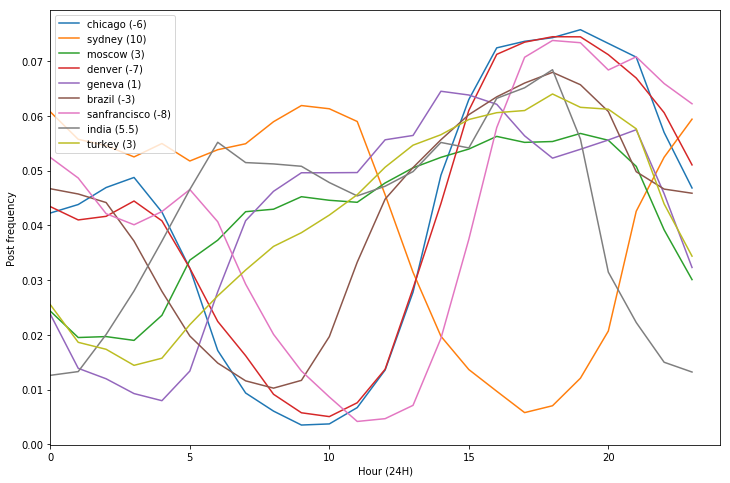

Training until validation scores don't improve for 100 rounds.
[60]	train's custom diff error: 1.2132	eval's custom diff error: 2.1744
[120]	train's custom diff error: 0.471897	eval's custom diff error: 1.87009
[180]	train's custom diff error: 0.263737	eval's custom diff error: 1.85446
[240]	train's custom diff error: 0.168059	eval's custom diff error: 1.85619
Early stopping, best iteration is:
[163]	train's custom diff error: 0.304614	eval's custom diff error: 1.85065
Plot metrics recorded during training...
Plot feature importances...


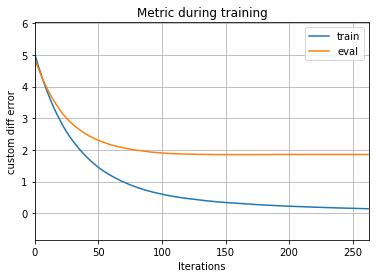

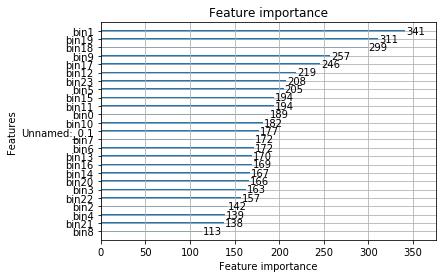

In [60]:
# ML: Boosted decision tree ( lightgbm )

ml = ML(path+folder+dataset)

ml.postAvgTimesByRegion()

x_tr,x_val,y_tr,y_val = ml.trainTestSplit()

lgb_model = ml.run_lightgbm(x_tr,x_val,y_tr,y_val)

In [61]:
y_tr_pred = lgb_model.predict(x_tr)
y_val_pred = lgb_model.predict(x_val)

In [62]:

def approx_accuracy(y,ypred):    
    #calculating how many predictions got exactly the right zone, after rounding.
    rounded_err = np.round(y) - np.round(ypred)
    approx_accuracy = list(rounded_err).count(0.0) / len(rounded_err)        

    print(approx_accuracy)

    return approx_accuracy


In [63]:
acc_tr = approx_accuracy(y_tr,y_tr_pred)

0.7338709677419355


In [64]:
acc_val = approx_accuracy(y_val,y_val_pred)

0.3258426966292135


In [70]:
def plot_y_ypred(y_tr_true,y_tr_pred,y_test_true,y_test_pred):
#         y_tr_pred = y_tr_pred_tensor.squeeze().detach().numpy()
#         y_tr_true = y_tr_tensor.squeeze().detach().numpy()
#         y_test_pred = y_test_pred_tensor.squeeze().detach().numpy()
#         y_test_true = y_test_tensor.squeeze().detach().numpy()

        fig, axes = plt.subplots(1, 2, figsize=(16,8))
        ax_train = axes[0]
        ax_test = axes[1]

        df_tr = pd.DataFrame({'true':y_tr_true, 'pred':y_tr_pred})
        df_test = pd.DataFrame({'true':y_test_true, 'pred':y_test_pred})

        mean_tr = df_tr.groupby(['true']).mean()
        tr_bins = mean_tr.index.values
        mean_tr_pred = mean_tr.values[:,0]

        mean_test = df_test.groupby(['true']).mean()
        test_bins = mean_test.index.values
        mean_test_pred = mean_test.values[:,0]

        ideal = np.arange(-12, 13, 1)
        ax_train.plot(y_tr_true, y_tr_pred, color='tomato', marker='+', linestyle='None')
        ax_train.plot(ideal, ideal, color='lightgray', label='ideal')
        ax_train.plot(tr_bins, mean_tr_pred, color='black', marker='+', markersize=15, linestyle='dashed', label='bin avg')
        ax_train.set_xlabel('true train y values (time zone)')
        ax_train.set_ylabel('pred train y values (time zone)')
        ax_train.set_xlim((-13,13))
        ax_train.legend()

        ax_test.plot(y_test_true, y_test_pred, color='cornflowerblue', marker='+', linestyle='None')
        ax_test.plot(ideal, ideal, color='lightgray', label='ideal')
        ax_test.plot(test_bins, mean_test_pred, color='black', marker='+', markersize=15, linestyle='dashed', label='bin avg')
        ax_test.set_xlabel('true test y values (time zone)')
        ax_test.set_ylabel('pred test y values (time zone)')
        ax_test.set_xlim((-13,13))
        ax_test.legend()


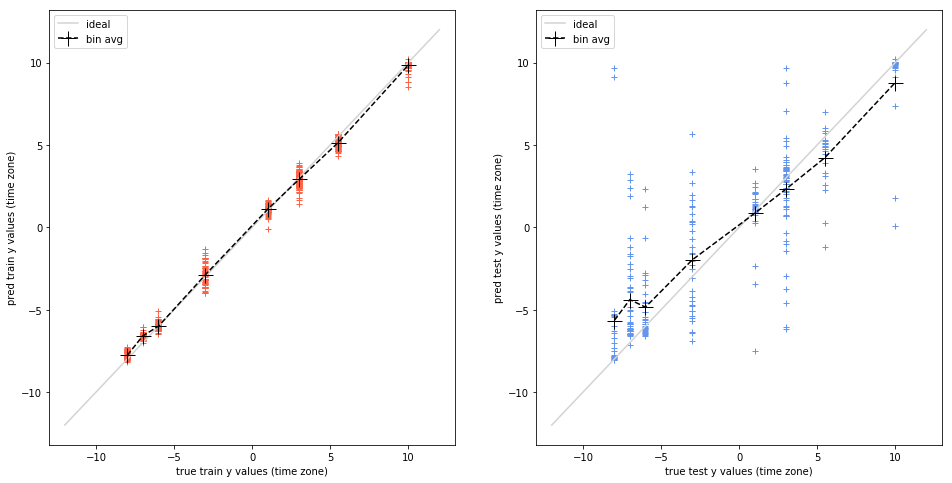

In [71]:
plot_y_ypred(y_tr,y_tr_pred,y_val,y_val_pred)

In [ ]:
# x_train,x_val,y_train,y_val = ml.trainTestSplit()
# lgb_train = lgb.Dataset(x_train, label=y_train)
# lgb_test = lgb.Dataset(x_val, label=y_val)


# def custom_metric(y_pred, train_data):
#     y_true = train_data.get_label()
#     diff = np.abs(y_true - y_pred)
#     diff[diff>12] = 24 - diff
#     err=np.mean(diff)
#     return 'custom diff error',err,False

# evals_result={}
# lgb_params = {
#                'objective': 'mse', 
#                'metric': 'custom_metric',
#                'nthread':4, 
#                'learning_rate': 0.03, 
#                'verbose':1,
#                'min_data':2,
#                'min_data_in_bin':1,
#               }

# num_boost_round = 200
# verbose_eval = int(num_boost_round/5)
# model = lgb.train(lgb_params, 
#                   lgb_train,
#                   valid_sets=[lgb_train, lgb_test],
#                   valid_names=['train','eval'],
#                   num_boost_round=num_boost_round,
#                   evals_result=evals_result,
#                   early_stopping_rounds=100,
#                   verbose_eval=verbose_eval,
#                   feval=custom_metric,
#                  )
#
# print('Plot metrics recorded during training...')
# # ax = lgb.plot_metric(evals_result, metric='rmse')
# ax = lgb.plot_metric(evals_result, metric='custom diff error')
# #if(saveplots):plt.savefig(saveFolder+"/"+"lgb_plot_metric_"+saveName+".pdf")

# print('Plot feature importances...')
# ax = lgb.plot_importance(model, max_num_features=x_val.shape[1])
# # ax.figure.set_size_inches(6.4*2,4.8*3)
# # if(saveplots):plt.savefig(saveFolder+"/"+"lgb_plot_importance_"+saveName+".pdf")

# plt.show()